# Trabajo Práctico N° 3: Clustering
## Natalia Mellino

In [1]:
# imports
library(MASS)
install.packages("e1071") 
library(e1071)

Installing package into ‘/home/nmellino/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)



## Ejercicio 1

 sp      sex         index            FL              RW              CL       
 B:100   F:100   Min.   : 1.0   Min.   : 7.20   Min.   : 6.50   Min.   :14.70  
 O:100   M:100   1st Qu.:13.0   1st Qu.:12.90   1st Qu.:11.00   1st Qu.:27.27  
                 Median :25.5   Median :15.55   Median :12.80   Median :32.10  
                 Mean   :25.5   Mean   :15.58   Mean   :12.74   Mean   :32.11  
                 3rd Qu.:38.0   3rd Qu.:18.05   3rd Qu.:14.30   3rd Qu.:37.23  
                 Max.   :50.0   Max.   :23.10   Max.   :20.20   Max.   :47.60  
       CW              BD       
 Min.   :17.10   Min.   : 6.10  
 1st Qu.:31.50   1st Qu.:11.40  
 Median :36.80   Median :13.90  
 Mean   :36.41   Mean   :14.03  
 3rd Qu.:42.00   3rd Qu.:16.60  
 Max.   :54.60   Max.   :21.60  

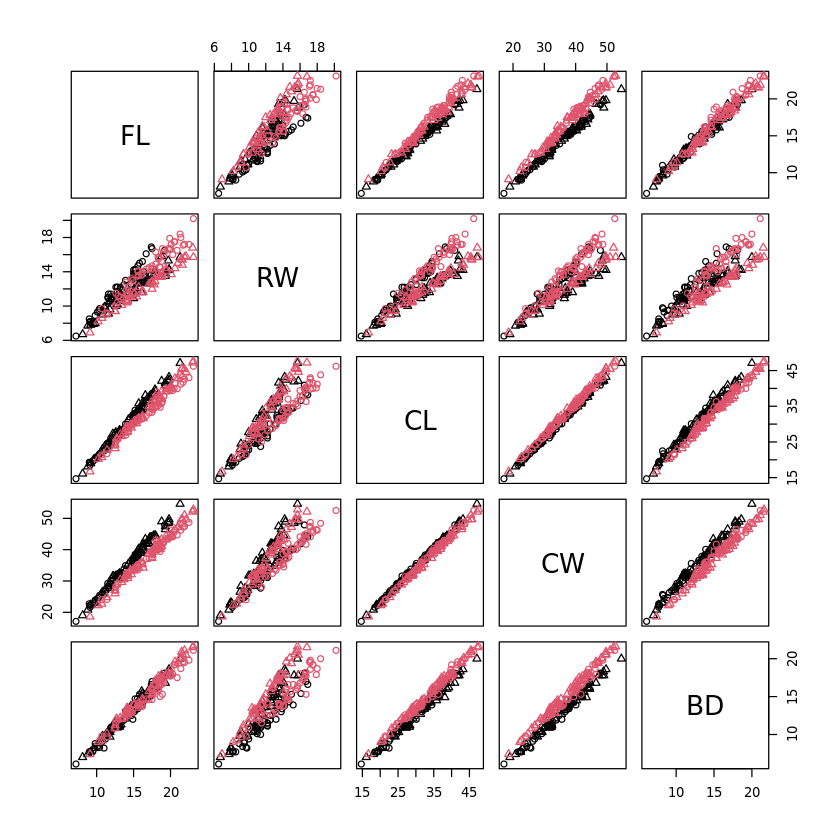

In [2]:
data(crabs)
summary(crabs)
plot(crabs[,4:8],col=as.numeric(crabs[,1]),pch=as.numeric(crabs[,2]))


In [32]:
# Lo convertimos a escala logaritmica y le hacemos un scale
crabs.log <- crabs
crabs.log[,4:8] <- log(crabs[,4:8])
crabs.log.scaled <- crabs.log
crabs.log.scaled[, 4:8] <- scale(crabs.log[,4:8])
# Aplicamos un scale luego de hacer el prcomp ya que no veíamos mejoras
crabs.log.scaled.pca <- prcomp(crabs.log.scaled[,4:8], retx=TRUE)$x
crabs.log.scaled.pca.scaled <- scale(crabs.log.scaled.pca)


In [33]:
crab.log.km <- kmeans(crabs.log[, 4:8], cent=2)
crab.log.scaled.km <- kmeans(crabs.log.scaled[, 4:8], cent=2)
crab.log.scaled.pca.km <- kmeans(crabs.log.scaled.pca, cent=2)
crab.log.scaled.pca.scaled.km <- kmeans(crabs.log.scaled.pca.scaled, cent=2)

In [50]:
check.cluster <- function(cc, original){
  cont.table <- table(original,cc$cluster)
  class.match <- matchClasses(as.matrix(cont.table),method="exact")
  print(cont.table[,class.match])
  print(cont.table)
}

In [51]:
check.cluster(crab.log.km, crabs$sex)
check.cluster(crab.log.km, crabs$sp)

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 51.5 %
        
original  2  1
       F 64 36
       M 61 39
        
original  1  2
       F 36 64
       M 39 61
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 60.5 %
        
original  1  2
       B 48 52
       O 27 73
        
original  1  2
       B 48 52
       O 27 73


In [52]:
check.cluster(crab.log.scaled.km, crabs$sex)
check.cluster(crab.log.scaled.km, crabs$sp)

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 51.5 %
        
original  1  2
       F 64 36
       M 61 39
        
original  1  2
       F 64 36
       M 61 39
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 60.5 %
        
original  2  1
       B 48 52
       O 27 73
        
original  1  2
       B 52 48
       O 73 27


In [53]:
check.cluster(crab.log.scaled.pca.km, crabs$sex)
check.cluster(crab.log.scaled.pca.km, crabs$sp)

Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 51.5 %
        
original  1  2
       F 64 36
       M 61 39
        
original  1  2
       F 64 36
       M 61 39
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 60.5 %
        
original  2  1
       B 48 52
       O 27 73
        
original  1  2
       B 52 48
       O 73 27


In [54]:
check.cluster(crab.log.scaled.pca.scaled.km, crabs$sex)
check.cluster(crab.log.scaled.pca.scaled.km, crabs$sp)

Direct agreement: 2 of 2 pairs
Cases in matched pairs: 94.5 %
        
original  1  2
       F 90 10
       M  1 99
        
original  1  2
       F 90 10
       M  1 99
Direct agreement: 0 of 2 pairs
Iterations for permutation matching: 2 
Cases in matched pairs: 51.5 %
        
original  2  1
       B 56 44
       O 53 47
        
original  1  2
       B 44 56
       O 47 53


- Observamos que en el caso de kmeans hay que hacer varias transformaciones antes de ver una mejora en la performance.
- Por otro lado, en la mayoría de las corridas para `crab.log.scaled.pca.scaled.km` (que es donde se empieza a ver una mejora), observamos que alcanza una performance por arriba del 90% pero sólo para una de las clases, el sexo. Esto nos indica que el algoritmo aplicado al dataset separa mejor esta clase que la clase 'especie'.